# Proyecto de Reconocimiento Dígitos con Redes Neuronales

> Machine Learning
>
> [Alan Badillo Salas](mailto:alan@nomadacode.com)
>
> Github: [https://github.com/dragonnomada/ml-2023](https://github.com/dragonnomada/ml-2023)

**Contenido**

* Fase 1 - Adquisición de las imágenes de aprendizaje de MNIST
* Fase 2 - Visualización de los dígitos escritos a mano de entrenamiento
* Fase 3 - Construcción de la red neuronal para el aprendizaje
* Fase 4 - Visualización de los dígitos escritos a mano de prueba
* Fase 5 - Creación de una matriz que representa un dígito escrito a mano
* Fase 6 - Crear una aplicación para dibujar dígitos escritos a mano
* Fase 8 - Detectar el dígito escrito a mano en la aplicación

In [ ]:
! pip install tensorflow

In [12]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [13]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [14]:
x = X_train[0]

x.shape

(28, 28)

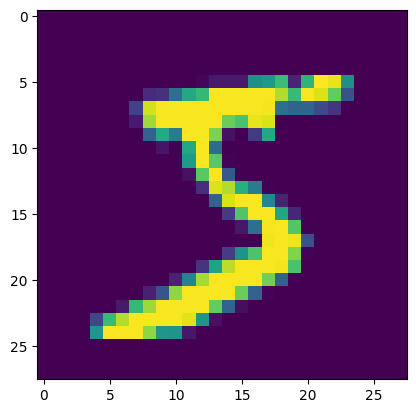

5

In [18]:
def show_digit(x):
    import matplotlib.pyplot as plt

    plt.imshow(x)

    plt.show()

show_digit(x)

y_train[0]

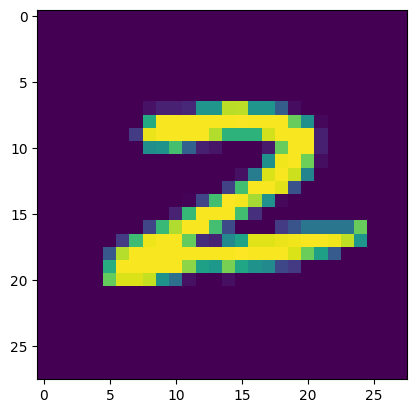

2

In [19]:
show_digit(X_train[199])

y_train[199]

In [ ]:
! pip install tk

In [ ]:
! pip install pillow

https://ghostscript.com/index.html

Identificando imagen...
Obteniendo imagen...
Imagen lista :)
Escalando imagen a 28x28...
Imagen escalada a 28x28
Convirtiendo imagen a una matriz de numpy...
Imagen convertida a matriz
(28, 28)
Mostrando imagen del dígito...


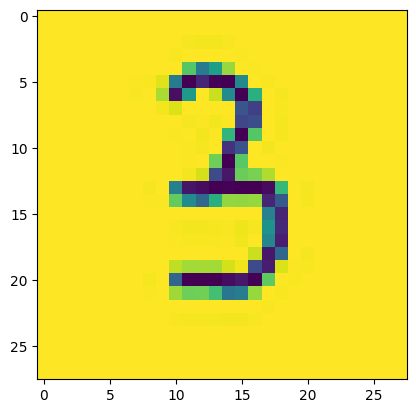

Imagen mostrada :O
Convirtiendo matriz de 28x28 a vector de 784...
[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 252 251 251 253 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 253 255 255 255 255 254 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 188 105 142
 216 255 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 254 253 244 105   0  26   2   0 122 255 253 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 253 255 223  10 138
 255 235 123   0 162 255 252 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 251 242 255 255 255 255  68  48 255 253 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 

In [23]:
from tkinter import *

app = None
canvas = None

image = None

line = None
line_points = []

def create_app():
    global app

    app = Tk()

    create_canvas()
    create_buttons()

    app.mainloop()

def create_buttons():
    image_get_button = Button(app, text="Identificar", command=digit_identifier)
    image_get_button.pack(pady=20)
    
    image_save_button = Button(app, text="Guardar", command=image_save)
    image_save_button.pack(pady=20)

    canvas_clear_button = Button(app, text="Borrar", command=canvas_clear)
    canvas_clear_button.pack(pady=20)

def create_canvas():
    global canvas
    
    canvas = Canvas(app, width=280, height=280, bg="white")
    canvas.pack()

    canvas.bind('<Button-1>', draw_start)
    canvas.bind('<B1-Motion>', draw_line)
    canvas.bind('<ButtonRelease-1>', draw_end)

def canvas_clear():
    canvas.delete("all")

def draw_start(event):
    line_points.extend((event.x, event.y))

def draw_line(event):
    global line
    
    line_points.extend((event.x, event.y))

    if line is not None:
        canvas.delete(line)

    line = canvas.create_line(line_points, width=12)

def draw_end(event=None):
    global line

    line = None
    line_points.clear()    

def image_get():
    global image

    print("Obteniendo imagen...")

    from PIL import Image
    from PIL import EpsImagePlugin
    import io
    
    EpsImagePlugin.gs_windows_binary =  r"D:\gs\gs10.01.2\bin\gswin64c.exe"

    canvas.update()
    
    ps = canvas.postscript(colormode="color")

    image = Image.open(io.BytesIO(ps.encode("utf-8")))

    print("Imagen lista :)")

def image_save():
    print("Guardando imagen...")

    image_get()
    image.save("image.png", "png")
    
    print("Imagen guardada :D")

def digit_identifier():
    print("Identificando imagen...")

    image_get()

    print("Escalando imagen a 28x28...")
    
    from PIL import Image

    image_scaled = image.resize((28, 28), Image.LANCZOS).convert("L")

    print("Imagen escalada a 28x28")

    print("Convirtiendo imagen a una matriz de numpy...")

    import numpy as np

    x = np.array(image_scaled)

    print("Imagen convertida a matriz de 28x28")

    print(x.shape)

    print("Mostrando imagen del dígito...")

    show_digit(x)

    print("Imagen mostrada :O")

    print("Convirtiendo matriz de 28x28 a vector de 784...")

    xi = x.reshape((784,))

    print("Matriz de 28x28 convertida a vector de 784")

    print(xi.shape)

    # TODO: Importar y usar la red neuronal entrenada para reconocer dígitos

create_app()